### Setting up data for RNN

In [1]:
from pandas import read_csv
import numpy as np

In [2]:
df = read_csv("Dataset/international-airline-passengers.csv" ,usecols=[1])

In [3]:
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [4]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [6]:
train_size = int(values.shape[0]*0.67)
test_size = values.shape[0] - train_size
train_size , test_size

(96, 48)

In [7]:
train = values[0:train_size]
train

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [8]:
test = values[train_size:]
test

array([[315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]], dtype=float32)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [10]:
def create_dataset(data,k):
    dataX, dataY = [],[]
    for i in range(data.shape[0]- k):
        x = data[i:i+k,0]
        y = data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [11]:
look_back = 12
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)

In [12]:
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

### Setting up RNN Model

In [13]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [19]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1)

Epoch 1/100
84/84 [==============================] - 1s 3ms/step - loss: 0.4201
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.1754
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.1090
Epoch 4/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0837
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0667
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0550
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 8/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0394
Epoch 9/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 10/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0305
Epoch 11/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 12/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 13/100
84/84 [=================

### Analysing output

In [20]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape,testTrue.shape

3/3 [==============================] - 0s 3ms/step


((36,), (36,))

In [21]:
from matplotlib import pyplot as plt

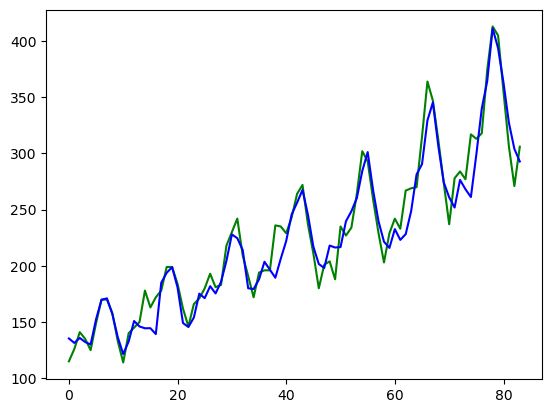

In [22]:
plt.plot(trainTrue, c='g')
plt.plot(trainPredict, c='b');

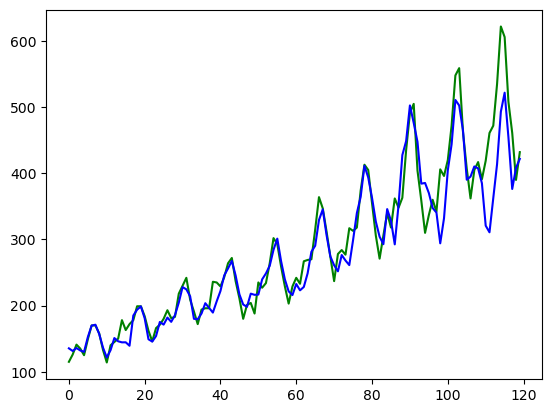

In [23]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()